In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### data derived from 
https://data.world/raghav333/fifa-players

In [2]:
data = pd.read_csv('fifa.csv')

In [3]:
data.head(3)

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3


In [4]:
# immediately see incorrect height for christian Eriksen ¯\_(ツ)_/
data.loc[1, 'height_cm'] = 182

In [5]:
data.describe()

,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,215411.087780,25.565445,174.948428,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,...,48.357302,58.680183,47.162861,47.733040,45.705915,16.784449,16.556199,16.388660,16.541049,16.874067
std,29758.387106,4.705708,14.028753,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,...,15.810844,11.625541,20.037346,21.674973,21.285812,17.893895,17.108234,16.701447,17.231495,18.182943
min,16.000000,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,...,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201117.250000,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,222919.000000,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.500000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,237613.500000,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,247607.000000,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,90.000000,94.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

In [7]:
data.preferred_foot.unique()  

array(['Left', 'Right'], dtype=object)

In [8]:
data.work_rate.value_counts()

Medium/ Medium    9690
High/ Medium      3093
Medium/ High      1681
High/ High         934
Medium/ Low        905
High/ Low          673
Low/ Medium        522
Low/ High          422
Low/ Low            34
Name: work_rate, dtype: int64

In [9]:
data.body_type.value_counts()

Normal                 10393
Lean                    6468
Stocky                  1086
Messi                      1
C. Ronaldo                 1
Akinfenwa                  1
Shaqiri                    1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Neymar                     1
Name: body_type, dtype: int64

In [10]:
data[data['body_type'] == "PLAYER_BODY_TYPE_25"]
# Salah have PLAYER_BODY_TYPE_25 -_____-

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
14,209331,M. Salah,Mohamed Salah Ghaly,1992-06-15,26,175.26,71.2,"RW,ST",Egypt,89,...,70+3,66+3,66+3,66+3,70+3,66+3,57+3,57+3,57+3,66+3


In [11]:
data.loc[data[data['body_type'] == "Neymar"].index[0], 'body_type'] = 'Normal'
data.loc[data[data['body_type'] == "Courtois"].index[0], 'body_type'] = 'Lean'
data.loc[data[data['body_type'] == "Shaqiri"].index[0], 'body_type'] = 'Stocky'
data.loc[data[data['body_type'] == "Akinfenwa"].index[0], 'body_type'] = 'Stocky'
data.loc[data[data['body_type'] == "Messi"].index[0], 'body_type'] = 'Normal'
data.loc[data[data['body_type'] == "C. Ronaldo"].index[0], 'body_type'] = 'Normal'
data.loc[data[data['body_type'] == "PLAYER_BODY_TYPE_25"].index[0], 'body_type'] = 'Normal'

### data preparation

In [12]:
data['release_clause_euro'].fillna(data['release_clause_euro'].median(), inplace=True)
data['value_euro'].fillna(data['value_euro'].median(), inplace=True)
data['wage_euro'].fillna(data['wage_euro'].median(), inplace=True)
data['wage_euro'].fillna(data['wage_euro'].median(), inplace=True)
data['club_rating'].fillna(data['club_rating'].min(), inplace = True)
data.drop(['club_position', 'club_jersey_number', 'club_join_date'], axis=1, inplace=True)
data['contract_end_year'].fillna('2018', inplace=True)

In [13]:
data.contract_end_year.unique()

array(['2021', '2020', '2022', '2023', '2024', 'Jun 30, 2019', '2025',
       '2018', '2019', 'May 31, 2020', 'Jun 30, 2020', 'Dec 31, 2019',
       'May 31, 2019', 'Jan 1, 2020', 'May 21, 2019', 'Jan 31, 2020',
       'Feb 27, 2020', 'Dec 1, 2019', 'Oct 14, 2019', 'Dec 31, 2018',
       'Mar 1, 2019', 'Jun 1, 2020', 'Jul 2, 2019', 'Dec 1, 2020', '2026'],
      dtype=object)

In [14]:
data['contract_end_year'] = data['contract_end_year'].apply(lambda x: int(x[-4:]))
data['national_team'].fillna(0, inplace=True)
data['national_team'] = data['contract_end_year'].apply(lambda x: 1 if x else x)
data['national_rating'].fillna(data['national_rating'].min(), inplace=True)
data.drop(['national_team_position', 'national_jersey_number'], axis=1, inplace=True)

it is clear that dimensionality of data could be reduced by combining similar skills, for example long_passing, \
short_passing and crossing are types of passing and it is probable that this features are higtly correlated

In [15]:
passing = ["long_passing", "short_passing", "crossing"]
data[passing].corr()

,long_passing,short_passing,crossing
long_passing,1.000000,0.898730,0.760086
short_passing,0.898730,1.000000,0.812404
crossing,0.760086,0.812404,1.000000


In [16]:
data['passing'] = data.apply(lambda x: x[passing].mean(), axis=1)
data.drop(passing, axis=1, inplace=True)

As we see this is true :) \
Let's consider another groups and combine them by calculating mean between features within groups

In [17]:
# defence group
defence = ['marking', 'standing_tackle', 'sliding_tackle']
data[defence].corr()

,marking,standing_tackle,sliding_tackle
marking,1.000000,0.911632,0.901460
standing_tackle,0.911632,1.000000,0.975138
sliding_tackle,0.901460,0.975138,1.000000


In [18]:
data["defence"] = data.apply(lambda x: x[defence].mean(), axis=1)
data.drop(defence, axis=1, inplace=True)

In [19]:
# speed
speed = ['acceleration', 'sprint_speed', 'agility']
data[speed].corr()

,acceleration,sprint_speed,agility
acceleration,1.000000,0.926151,0.816603
sprint_speed,0.926151,1.000000,0.770200
agility,0.816603,0.770200,1.000000


In [20]:
data["speed"] = data.apply(lambda x: x[speed].mean(), axis=1)
data.drop(speed, axis=1, inplace=True)

In [21]:
# physical
data[['balance', 'jumping', 'stamina', 'strength']].corr()

,balance,jumping,stamina,strength
balance,1.000000,0.197027,0.493076,-0.377310
jumping,0.197027,1.000000,0.357037,0.294135
stamina,0.493076,0.357037,1.000000,0.267100
strength,-0.377310,0.294135,0.267100,1.000000


In [22]:
data[['strength', 'weight_kgs', 'height_cm']].corr()

,strength,weight_kgs,height_cm
strength,1.000000,0.610431,0.318724
weight_kgs,0.610431,1.000000,0.495359
height_cm,0.318724,0.495359,1.000000


In [23]:
# mental
mental = ['aggression', 'interceptions', 'positioning', 
      'vision','composure']
data[mental].corr()

,aggression,interceptions,positioning,vision,composure
aggression,1.000000,0.754631,0.400890,0.311147,0.52978
interceptions,0.754631,1.000000,0.187181,0.190228,0.41059
positioning,0.400890,0.187181,1.000000,0.739388,0.59512
vision,0.311147,0.190228,0.739388,1.000000,0.64511
composure,0.529780,0.410590,0.595120,0.645110,1.00000


In [24]:
data['mental'] = data.apply(lambda x: x[mental].mean(), axis=1)
data.drop(mental, axis=1, inplace=True)

In [25]:
# shots
shots = ['finishing', 'volleys', 'freekick_accuracy', 
      'shot_power','long_shots', 'penalties']
data[shots].corr()

,finishing,volleys,freekick_accuracy,shot_power,long_shots,penalties
finishing,1.000000,0.886469,0.704828,0.820740,0.880080,0.840504
volleys,0.886469,1.000000,0.754154,0.835941,0.871201,0.834263
freekick_accuracy,0.704828,0.754154,1.000000,0.760653,0.808452,0.740312
shot_power,0.820740,0.835941,0.760653,1.000000,0.892452,0.799445
long_shots,0.880080,0.871201,0.808452,0.892452,1.000000,0.814800
penalties,0.840504,0.834263,0.740312,0.799445,0.814800,1.000000


In [26]:
data["shots"] = data.apply(lambda x: x[shots].mean(), axis=1)
data.drop(shots, axis=1, inplace=True)

In [27]:
# goalkeeper
goalkeeper = ['GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning', 'GK_reflexes']
data[goalkeeper].corr()

,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
GK_diving,1.000000,0.971103,0.966983,0.970662,0.974057
GK_handling,0.971103,1.000000,0.966523,0.969991,0.971087
GK_kicking,0.966983,0.966523,1.000000,0.965647,0.967480
GK_positioning,0.970662,0.969991,0.965647,1.000000,0.970906
GK_reflexes,0.974057,0.971087,0.967480,0.970906,1.000000


In [28]:
data["goalkeeper"] = data.apply(lambda x: x[goalkeeper].mean(), axis=1)
data.drop(goalkeeper, axis=1, inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17954 non-null  float64
 12  wage_euro                      17954 non-null 

In [30]:
data.drop(list(data.columns[34:62]), axis=1, inplace=True)
data.drop(['positions'], axis=1, inplace=True)

In [31]:
data[["value_euro", "wage_euro", "overall_rating"]].corr()

,value_euro,wage_euro,overall_rating
value_euro,1.000000,0.856652,0.626326
wage_euro,0.856652,1.000000,0.573311
overall_rating,0.626326,0.573311,1.000000


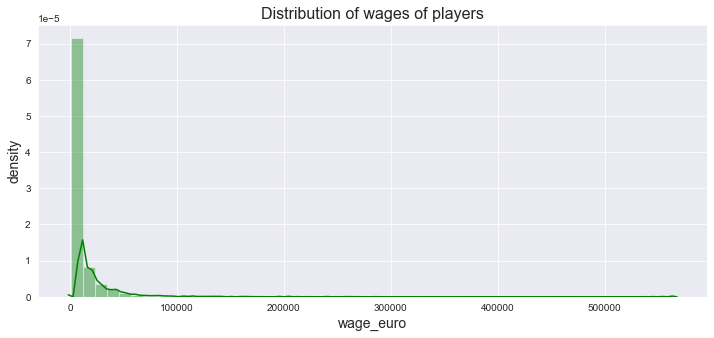

In [32]:
plt.figure(figsize=(12,5))
sns.distplot(data['wage_euro'], color = 'green')
plt.xlabel('wage_euro', fontsize = 14)
plt.ylabel('density', fontsize = 14)
plt.title('Distribution of wages of players', fontsize = 16)
plt.show()

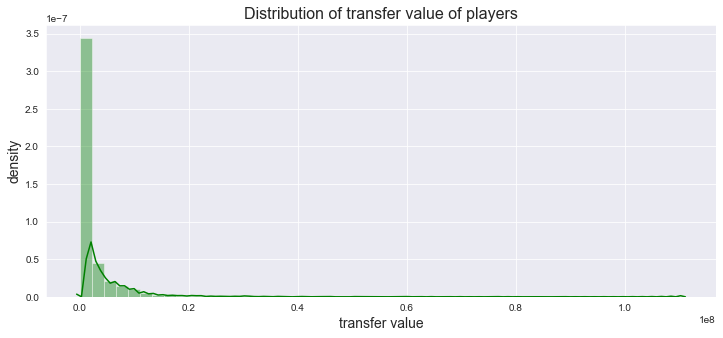

In [33]:
plt.figure(figsize=(12,5))
sns.distplot(data['value_euro'], color = 'green')
plt.xlabel('transfer value', fontsize = 14)
plt.ylabel('density', fontsize = 14)
plt.title('Distribution of transfer value of players', fontsize = 16)
plt.show()

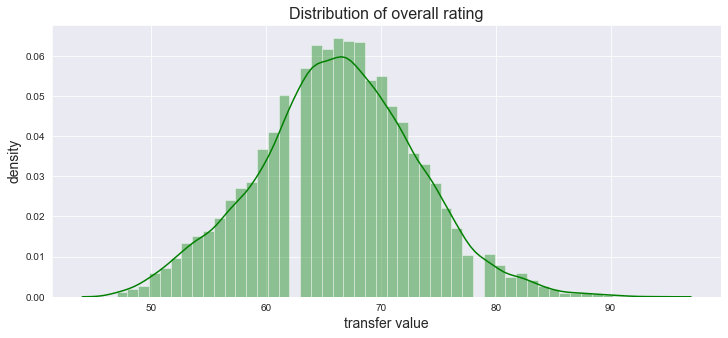

In [34]:
plt.figure(figsize=(12,5))
sns.distplot(data['overall_rating'], color = 'green')
plt.xlabel('transfer value', fontsize = 14)
plt.ylabel('density', fontsize = 14)
plt.title('Distribution of overall rating', fontsize = 16)
plt.show()

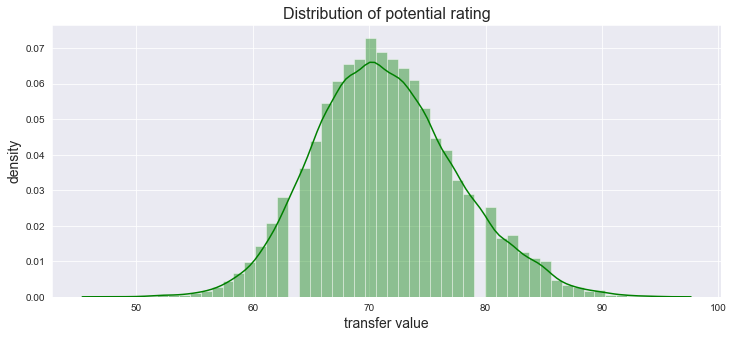

In [35]:
plt.figure(figsize=(12,5))
sns.distplot(data['potential'], color = 'green')
plt.xlabel('transfer value', fontsize = 14)
plt.ylabel('density', fontsize = 14)
plt.title('Distribution of potential rating', fontsize = 16)
plt.show()

In [36]:
print(f"mean of potential rating: {data.potential.mean()}")
print(f"mean of overall rating: {data.overall_rating.mean()}")
print(f"std of potential rating: {data.potential.std()}")
print(f"std of overall rating: {data.overall_rating.std()}")

from scipy.stats import ttest_ind

ttest_ind(data.potential, data.overall_rating)

mean of potential rating: 71.43093461067171
mean of overall rating: 66.24016932159964
std of potential rating: 6.131339100237638
std of overall rating: 6.96372978732242


Ttest_indResult(statistic=74.96241846869755, pvalue=0.0)

probably we may expect increase in football level in the future

In [37]:
data.drop('value_euro', axis=1, inplace=True) # transfer value and wage is higly correlated

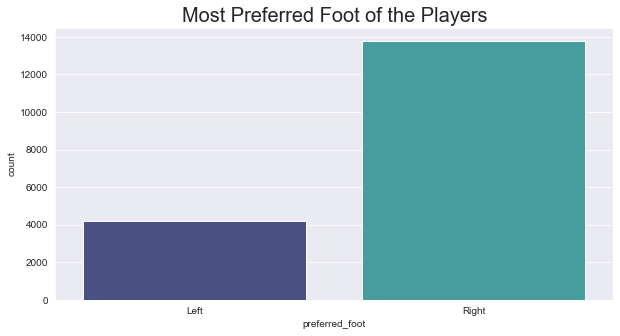

In [38]:
plt.figure (figsize=(10,5))
sns.countplot(data['preferred_foot'], palette='mako')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

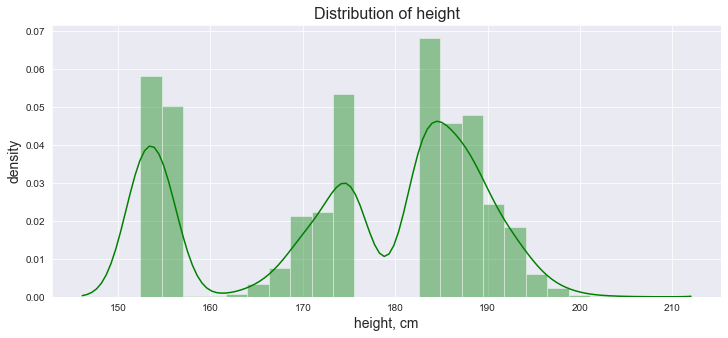

In [39]:
plt.figure(figsize=(12,5))
sns.distplot(data['height_cm'], color = 'green')
plt.xlabel('height, cm', fontsize = 14)
plt.ylabel('density', fontsize = 14)
plt.title('Distribution of height', fontsize = 16)
plt.show()

Distribution of height looks pretty strange

In [40]:
data[data.height_cm < 158]

,id,name,full_name,birth_date,age,height_cm,weight_kgs,nationality,overall_rating,potential,...,balance,jumping,stamina,strength,passing,defence,speed,mental,shots,goalkeeper
6,231747,K. Mbappé,Kylian Mbappé,1998-12-20,20,152.40,73.0,France,88,95,...,83,75,83,71,77.333333,33.333333,94.666667,71.2,76.000000,8.4
15,211110,P. Dybala,Paulo Bruno Exequiel Dybala,1993-11-15,25,152.40,74.8,Argentina,89,94,...,85,75,80,65,81.333333,21.000000,87.000000,67.0,86.000000,5.2
17,135507,Fernandinho,Fernando Luiz Rosa,1985-05-04,33,152.40,67.1,Brazil,87,87,...,78,78,84,76,78.666667,84.333333,69.000000,80.0,72.833333,9.6
29,198710,J. Rodríguez,James David Rodríguez Rubio,1991-07-12,27,154.94,74.8,Colombia,87,88,...,76,54,70,68,87.333333,45.666667,74.333333,74.8,86.333333,12.8
31,201399,M. Icardi,Mauro Emanuel Icardi Rivero,1993-02-19,26,154.94,74.8,Argentina,87,90,...,76,94,69,76,57.666667,29.666667,77.000000,63.8,76.166667,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17906,191043,Alex Sandro,Alex Sandro Lobo Silva,1991-01-26,28,154.94,79.8,Brazil,86,86,...,78,79,92,79,78.666667,83.000000,82.666667,77.2,65.666667,8.0
17910,201942,Roberto Firmino,Roberto Firmino Barbosa de Oliveira,1991-10-02,27,154.94,76.2,Brazil,86,87,...,81,81,90,74,77.666667,55.333333,78.333333,78.0,76.833333,8.8
17926,188350,M. Reus,Marco Reus,1989-05-31,29,154.94,71.2,Germany,88,88,...,82,70,76,67,82.333333,43.333333,85.333333,71.6,87.333333,12.2
17941,192985,K. De Bruyne,Kevin De Bruyne,1991-06-28,27,154.94,69.9,Belgium,91,92,...,77,63,89,75,92.000000,59.000000,77.666667,81.6,84.666667,11.2


In [41]:
data['height_cm'] = data["height_cm"].apply(lambda x: x + 25 if x < 158 else x)

It is obvious that height of many players is incorrect and their real height is deacreased by approximately 25cm 

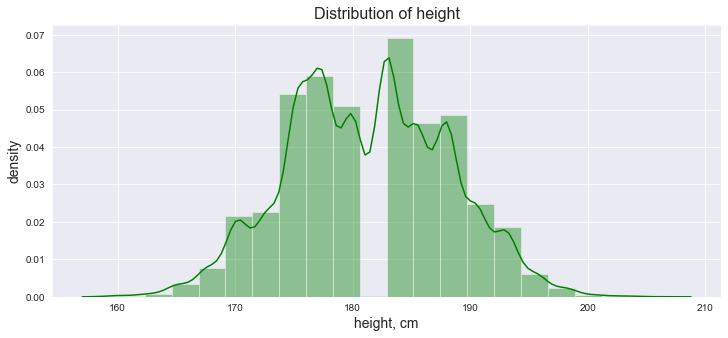

In [42]:
plt.figure (figsize=(12,5))
sns.distplot(data['height_cm'], color = 'green', bins=20)
plt.xlabel('height, cm', fontsize = 14)
plt.ylabel('density', fontsize = 14)
plt.title('Distribution of height', fontsize = 16)
plt.show()


much better now

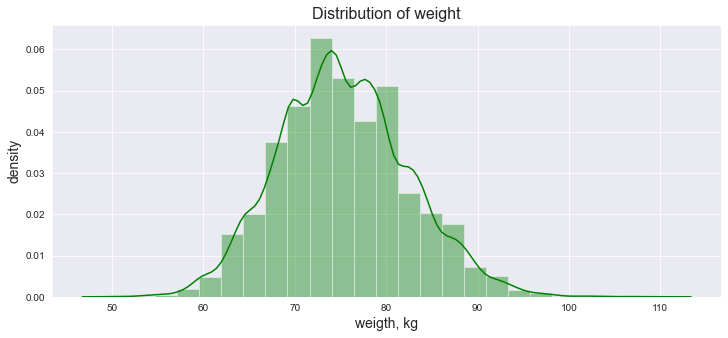

In [43]:
plt.figure(figsize=(12,5))
sns.distplot(data['weight_kgs'], color = 'green', bins=25)
plt.xlabel('weigth, kg', fontsize = 14)
plt.ylabel('density', fontsize = 14)
plt.title('Distribution of weight', fontsize = 16)
plt.show()

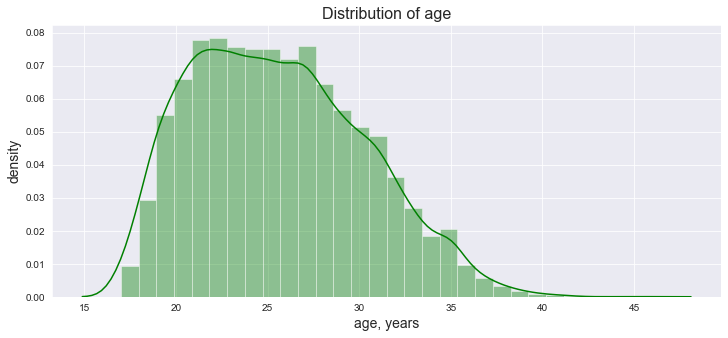

In [44]:
plt.figure(figsize=(12,5))
sns.distplot(data['age'], color = 'green', bins=30)
plt.xlabel('age, years', fontsize = 14)
plt.ylabel('density', fontsize = 14)
plt.title('Distribution of age', fontsize = 16)
plt.show()

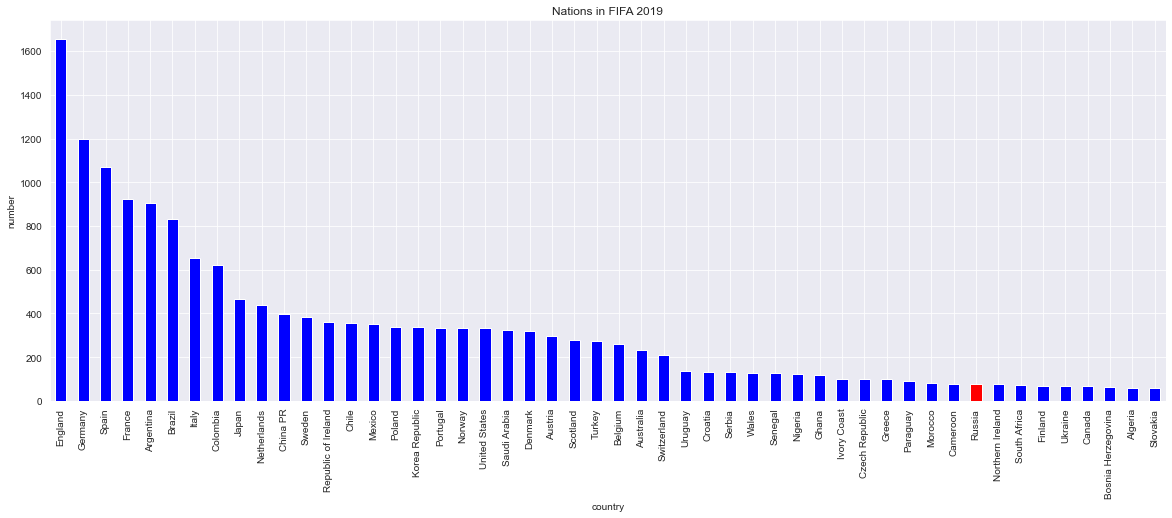

In [45]:
data['nationality'].value_counts().head(50).plot.bar(figsize = (20, 7), color=['red' if i==41 else 'blue' for i in range(50)])
plt.title('Nations in FIFA 2019')
plt.xlabel('country')
plt.ylabel('number')
plt.show()

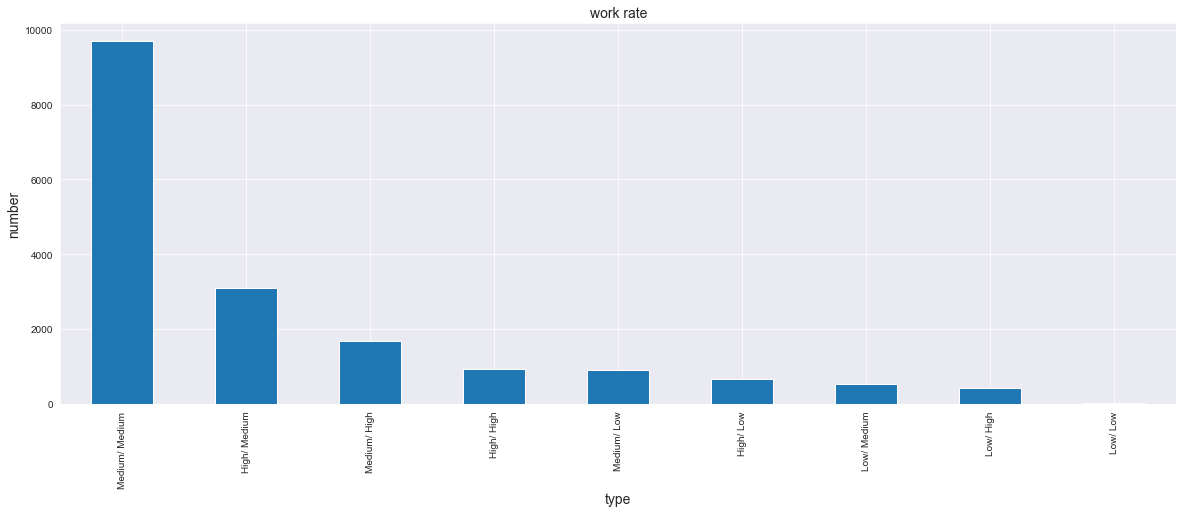

In [46]:
data['work_rate'].value_counts().plot.bar(figsize = (20, 7))
plt.title('work rate', fontsize=14)
plt.xlabel('type', fontsize=14)
plt.ylabel('number', fontsize=14)
plt.show()

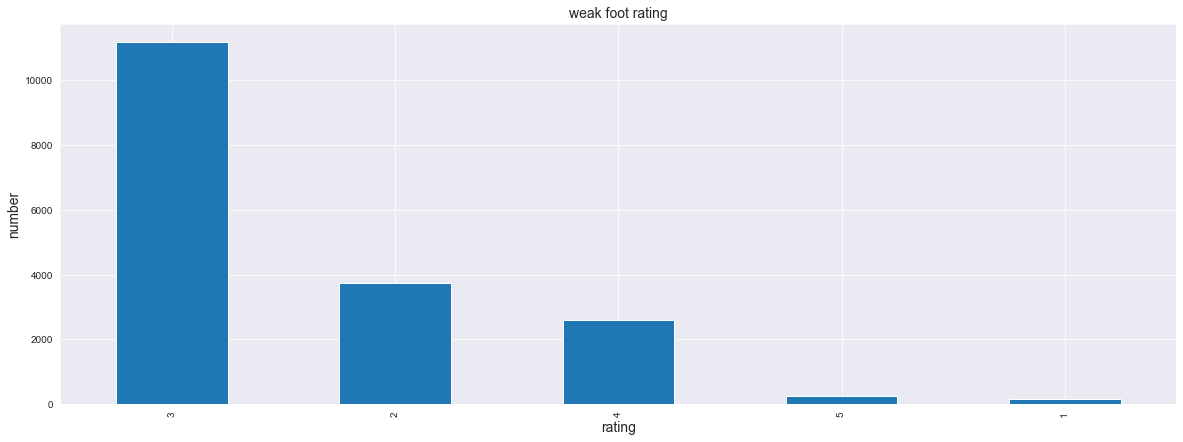

In [47]:
data['weak_foot(1-5)'].value_counts().plot.bar(figsize = (20, 7))
plt.title('weak foot rating', fontsize=14)
plt.xlabel('rating', fontsize=14)
plt.ylabel('number', fontsize=14)
plt.show()

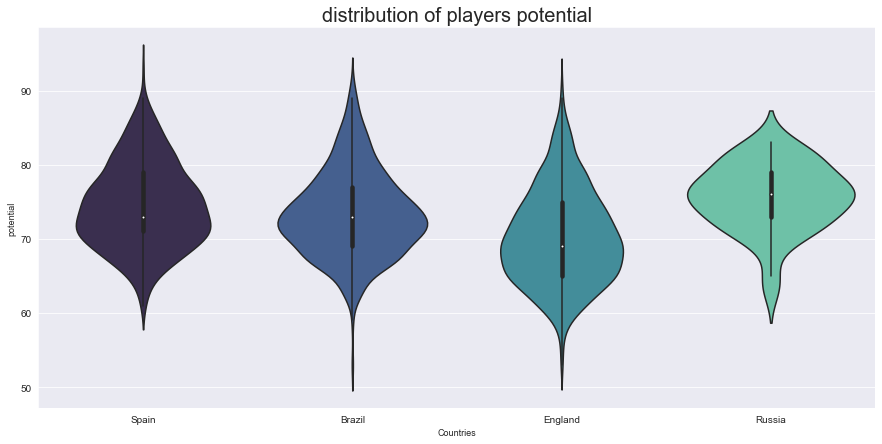

In [48]:
feature = 'potential'
some_countries = ('England', 'Spain', 'Brazil', 'Russia')
data_countries = data.loc[data['nationality'].isin(some_countries) & data[feature]]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['nationality'], y = data_countries[feature], palette = 'mako')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = feature, fontsize = 9)
ax.set_title(label = f'distribution of players {feature}', fontsize = 20)
plt.show()

Probably Russia has bright future in fifa 19 =)

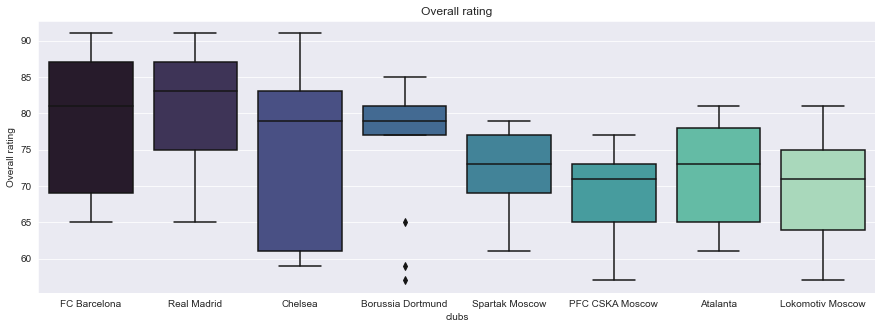

In [49]:
clubs = ['PFC CSKA Moscow', 'Spartak Moscow', 'Lokomotiv Moscow', 'Manchestar City',
             'Atalanta', 'FC Barcelona', 'Chelsea', 'Real Madrid', 'Borussia Dortmund']

data_clubs = data.loc[data['club_team'].isin(clubs) & data['overall_rating']]

plt.figure(figsize=(15,5))
ax = sns.boxplot(x = data_clubs['club_team'], y = data_clubs['overall_rating'], palette = 'mako')
ax.set_ylabel(ylabel = 'Overall rating')
ax.set_xlabel(xlabel = 'clubs')
ax.set_title(label = 'Overall rating')
plt.show()

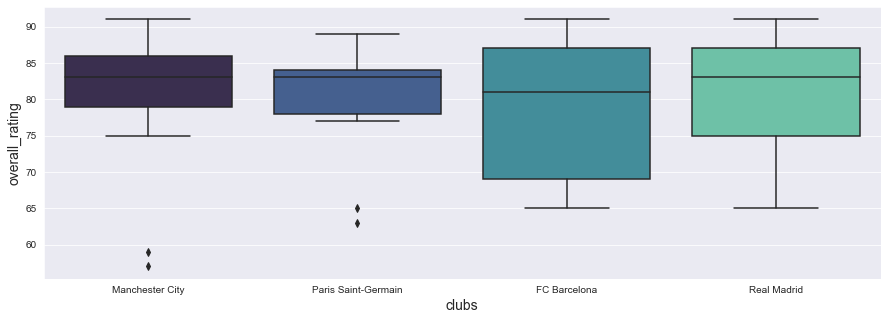

In [50]:
clubs = ['Manchester City', 'FC Barcelona', 'Real Madrid', 'Paris Saint-Germain']

data_clubs = data.loc[data['club_team'].isin(clubs) & data['overall_rating']]

plt.figure(figsize=(15,5))
ax = sns.boxplot(x = data_clubs['club_team'], y = data_clubs['overall_rating'], palette = 'mako')
ax.set_ylabel(ylabel = 'overall_rating', fontsize=14)
ax.set_xlabel(xlabel = 'clubs', fontsize=14)
plt.show()

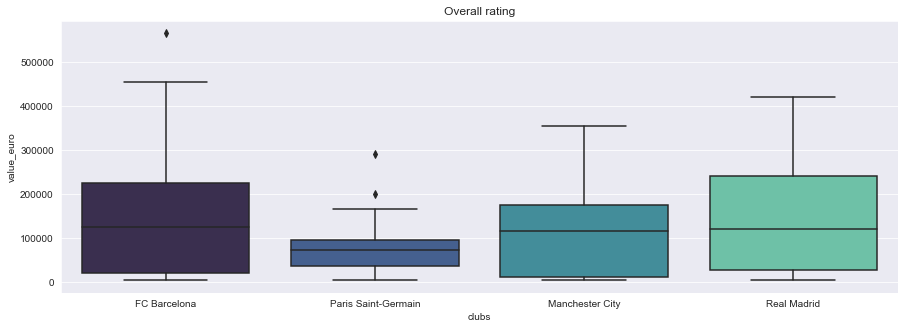

In [51]:
data_clubs = data.loc[data['club_team'].isin(clubs) & data['wage_euro']]

plt.figure(figsize=(15,5))
ax = sns.boxplot(x = data_clubs['club_team'], y = data_clubs['wage_euro'], palette = 'mako')
ax.set_ylabel(ylabel = 'value_euro')
ax.set_xlabel(xlabel = 'clubs')
ax.set_title(label = 'Overall rating')
plt.show()

Let's see best players in different domains

In [52]:
# playmaker
data[data.passing == data.passing.max()].name

17941    K. De Bruyne
Name: name, dtype: object

In [53]:
# goalkeeper
data[data.goalkeeper == data.goalkeeper.max()].name

17942    De Gea
Name: name, dtype: object

In [54]:
# defence
data[data.defence == data.defence.max()].name

17930    G. Chiellini
Name: name, dtype: object

In [55]:
# shots
data[data.shots == data.shots.max()].name

17944    Cristiano Ronaldo
Name: name, dtype: object

In [56]:
data[data.dribbling == data.dribbling.max()].name

0    L. Messi
Name: name, dtype: object

### Let's make simplest prediction of players' wage using catboost

In [57]:
import catboost

In [58]:
regressor = catboost.CatBoostRegressor()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  wage_euro                      17954 non-null  float64
 11  preferred_foot                 17954 non-null  object 
 12  international_reputation(1-5)  17954 non-null 

In [60]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [61]:
X = data.drop(["wage_euro", 'name', 'full_name', 'club_team', 'birth_date'], axis=1)
Y = data['wage_euro']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
regressor.fit(X_train, y_train, cat_features=['work_rate', 'body_type',
                                              'preferred_foot', 'nationality'], logging_level='Silent')

prediction = regressor.predict(X_test)
r2_score(y_test, prediction)

0.8819449344313626

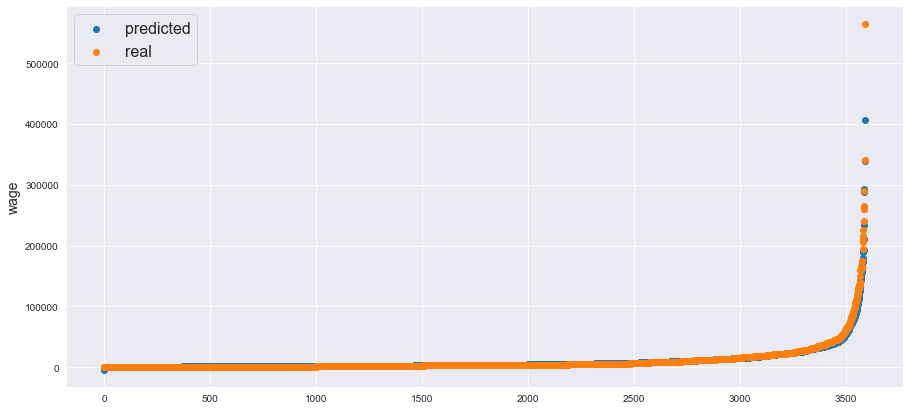

In [62]:
plt.scatter(np.arange(len(prediction)), sorted(prediction))
plt.scatter(np.arange(len(prediction)), sorted(y_test))
plt.ylabel("wage", fontsize=14)
plt.legend(['predicted', 'real'], fontsize=16)
plt.show()

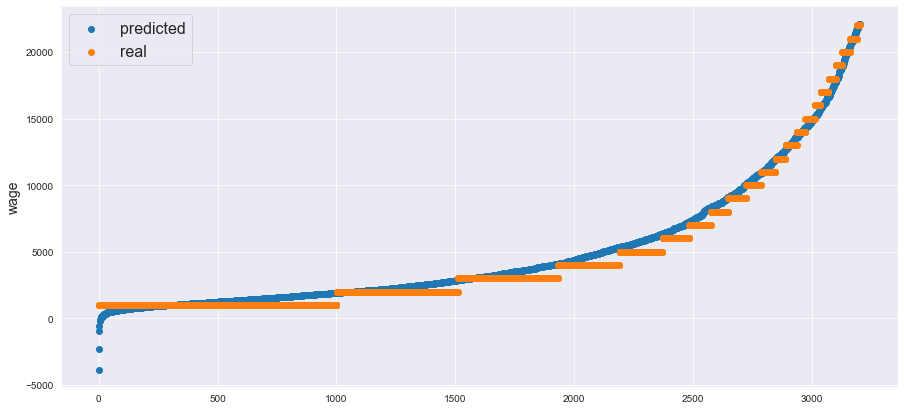

In [63]:
sep_idx = 3200

sorted_prediction = sorted(prediction)[:sep_idx]
sorted_test = sorted(y_test)[:sep_idx]
plt.ylabel("wage", fontsize=14)
plt.scatter(np.arange(len(sorted_prediction)), sorted_prediction)
plt.scatter(np.arange(len(sorted_prediction)), sorted_test)
plt.legend(['predicted', 'real'], fontsize=16)
plt.show()

well, catboost thinks some players should pay for being in team